In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/SkinCancerMNIST/SkinCancer_masks.npy')

In [3]:
images.shape

(12311, 512, 512, 1)

In [4]:
images.nbytes

12909019136

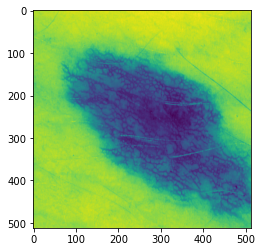

In [5]:
imshow(images[3])

In [6]:
masks.shape

(12311, 512, 512, 1)

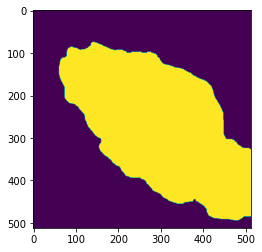

In [7]:
imshow(masks[3])

In [8]:
masks[1001].max()

True

In [9]:
import sys
sys.path.append('../')
import gp2

In [10]:
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
import numpy as np

class VisualizeMaskCallback(Callback):
    def __init__(self, validation_data, index=0):
        self.validation_data = validation_data
        self.index = index

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        # Select the image and mask at index 'self.index' from the validation set
        x_val, y_val = self.validation_data[0][self.index], self.validation_data[1][self.index]

        # Predict the mask for the image at index 'self.index' in the validation set
        y_pred = self.model.predict(x_val[np.newaxis, ...])[0]  # the prediction is made for only one image, so we index it with 0

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)

        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

In [11]:
vis_callback = VisualizeMaskCallback(validation_data=(images, masks), index=3)

In [12]:
from keras import losses

In [13]:
loss_fx = losses.hinge

In [14]:
C = gp2.KUC_UNet2D(loss=loss_fx)

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpqi0kcv8gkuc_unet2d


In [15]:
hist = C.train(images[0:1000], masks[0:1000], images[1000:1500], masks[1000:1500], batch_size=16)

Epoch 1/100
63/63 [==============================] - 39s 470ms/step - loss: 0.9329 - dice_coeff: 0.6343 - val_loss: 1.4355 - val_dice_coeff: 0.4298
Epoch 2/100
63/63 [==============================] - 25s 399ms/step - loss: 0.8920 - dice_coeff: 0.6812 - val_loss: 1.2152 - val_dice_coeff: 0.3671
Epoch 3/100
63/63 [==============================] - 25s 399ms/step - loss: 0.8785 - dice_coeff: 0.6982 - val_loss: 1.0540 - val_dice_coeff: 0.0757
Epoch 4/100
63/63 [==============================] - 25s 399ms/step - loss: 0.8683 - dice_coeff: 0.7220 - val_loss: 0.9919 - val_dice_coeff: 0.1098
Epoch 5/100
63/63 [==============================] - 25s 400ms/step - loss: 0.8658 - dice_coeff: 0.7287 - val_loss: 0.8780 - val_dice_coeff: 0.6870
Epoch 6/100
63/63 [==============================] - 25s 402ms/step - loss: 0.8554 - dice_coeff: 0.7427 - val_loss: 0.9344 - val_dice_coeff: 0.4186
Epoch 7/100
63/63 [==============================] - 25s 402ms/step - loss: 0.8517 - dice_coeff: 0.7560 - val_lo

In [16]:
def visualize_predictions(model, images, masks, num_samples=100):
    for i in range(num_samples):
        x_val, y_val = images[i], masks[i]
        y_pred, _ = model.predict(x_val[np.newaxis, ...], y_val[np.newaxis, ...])

        # Draw the input image, true mask, and predicted mask
        fig, ax = plt.subplots(nrows=1, ncols=3)
        
        ax[0].imshow(x_val)
        ax[0].title.set_text('Input Image')

        ax[1].imshow(y_val.squeeze(), cmap='gray')
        ax[1].title.set_text('True Mask')

        ax[2].imshow(y_pred.squeeze(), cmap='gray')
        ax[2].title.set_text('Predicted Mask')

        plt.show()

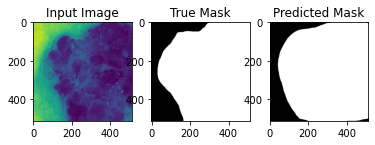

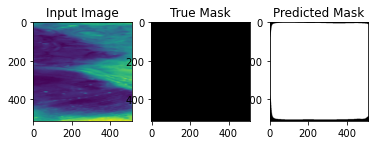

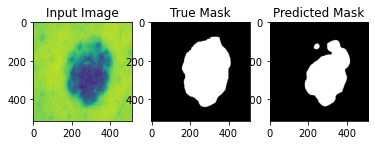

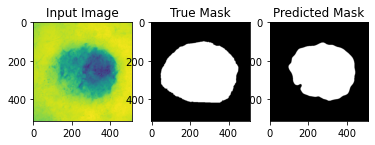

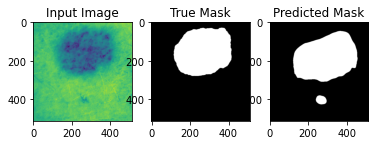

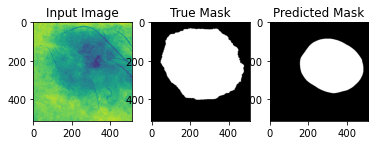

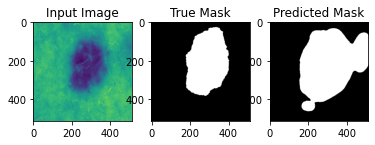

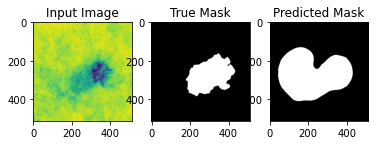

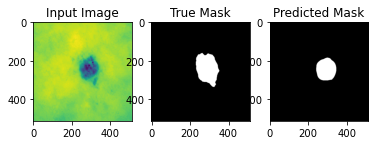

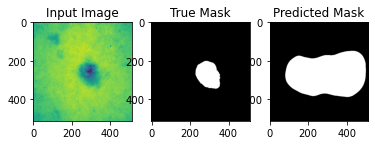

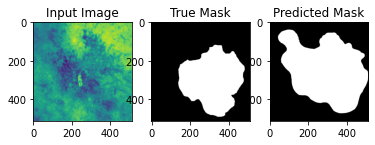

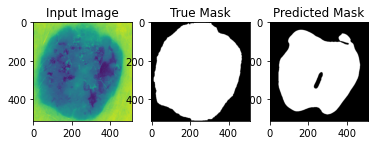

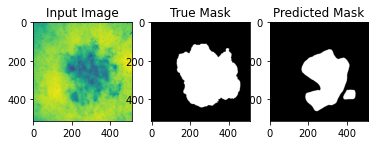

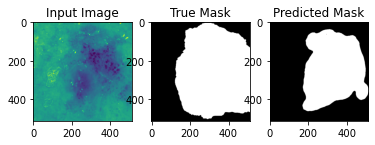

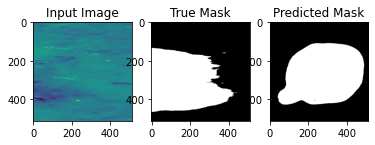

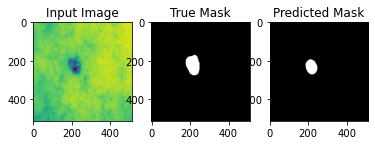

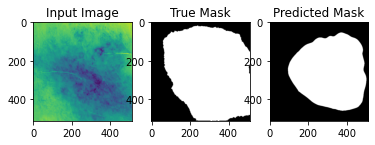

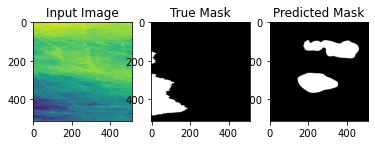

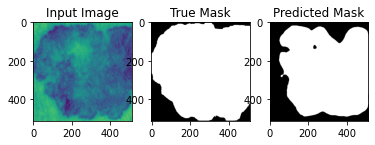

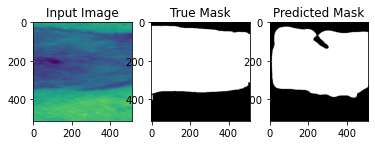

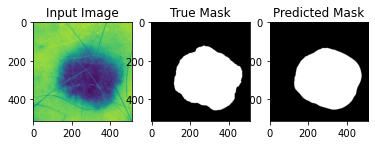

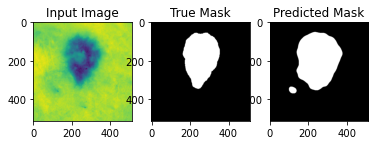

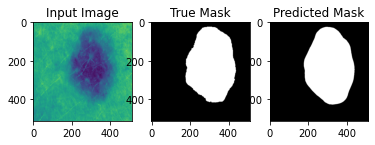

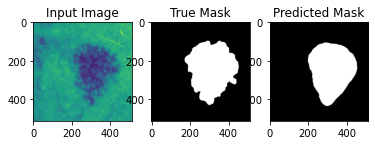

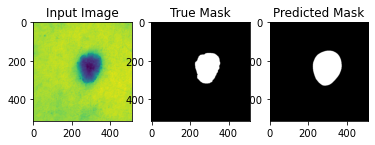

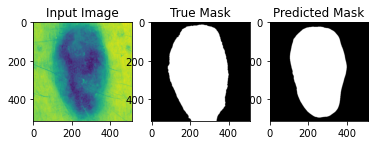

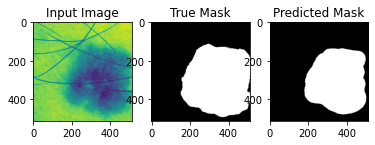

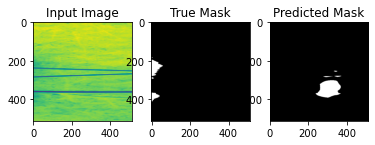

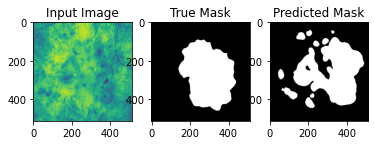

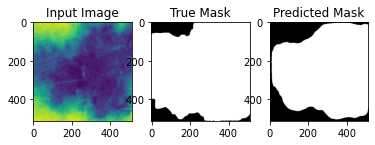

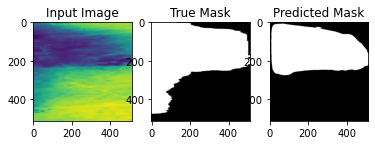

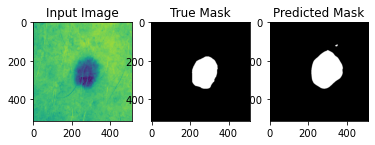

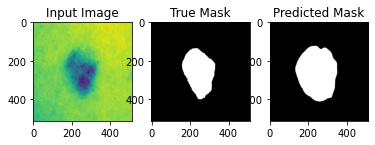

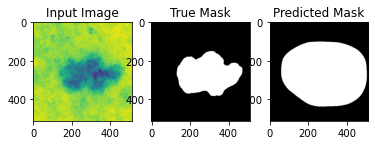

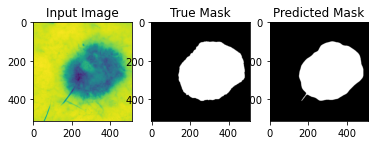

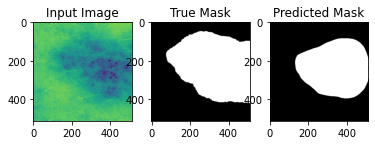

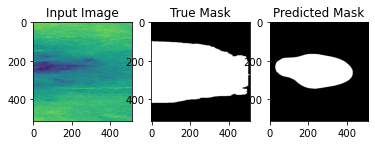

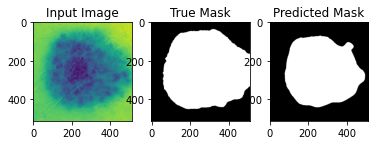

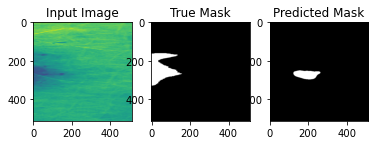

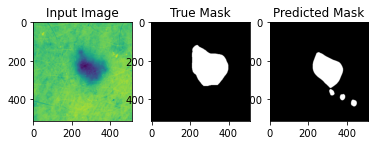

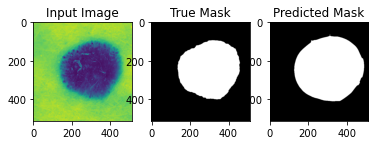

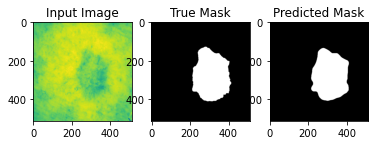

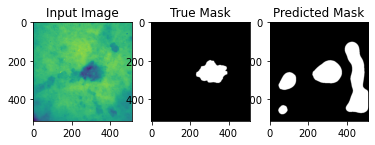

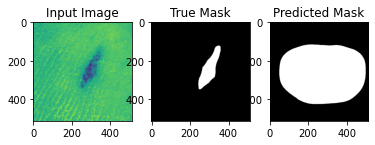

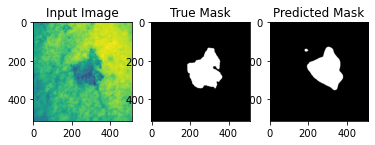

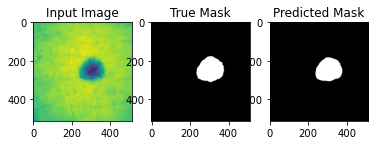

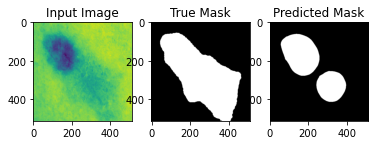

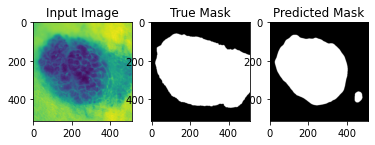

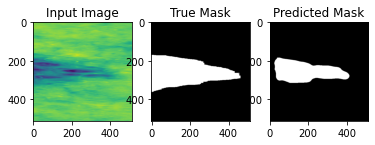

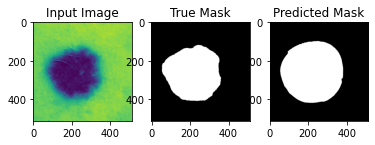

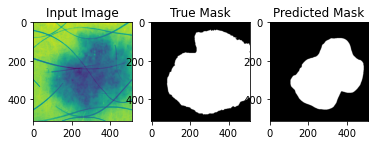

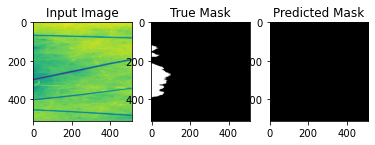

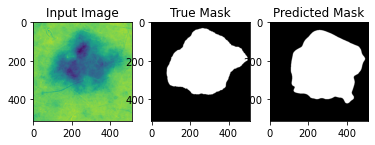

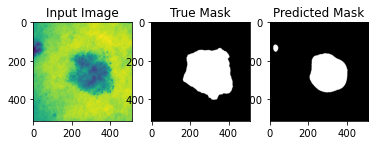

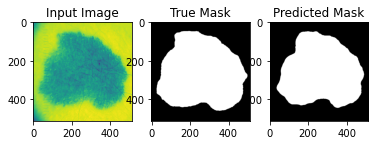

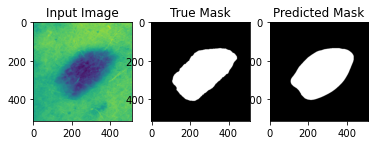

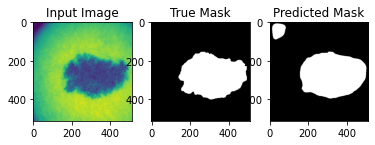

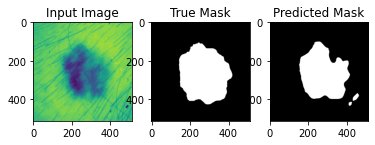

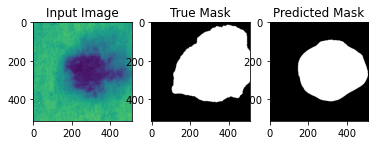

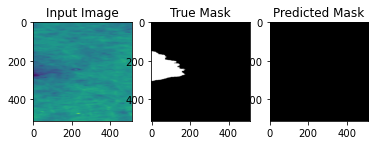

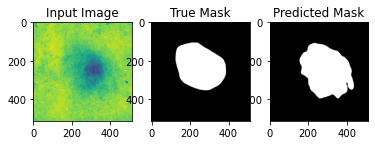

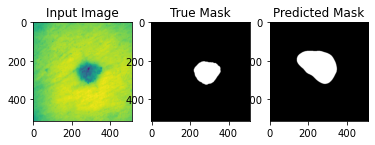

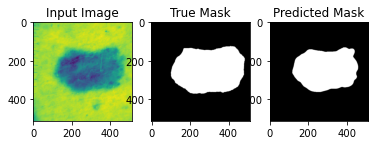

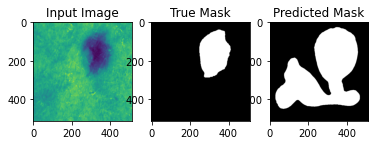

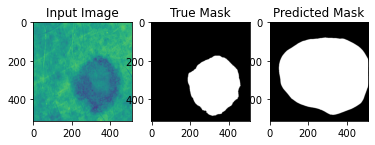

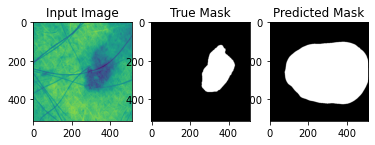

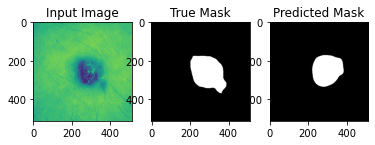

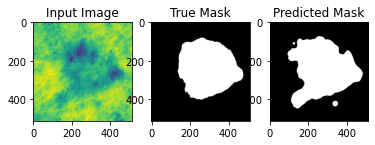

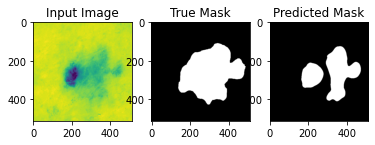

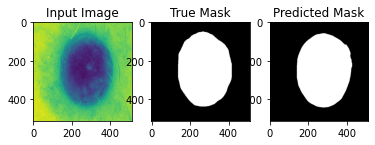

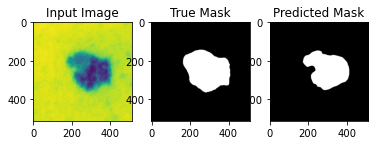

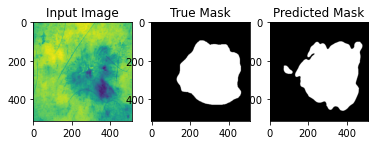

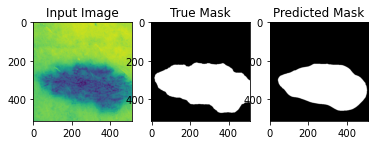

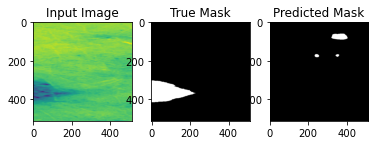

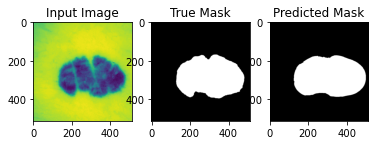

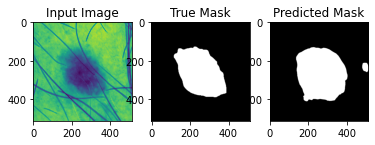

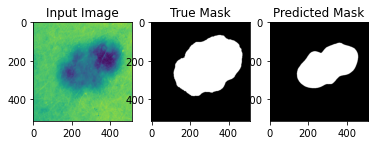

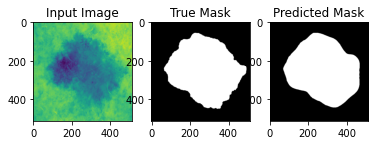

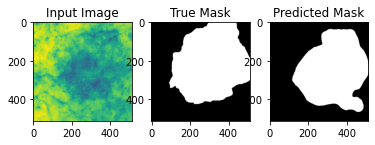

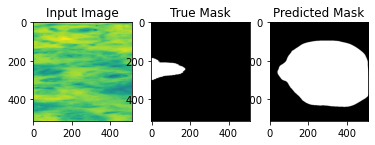

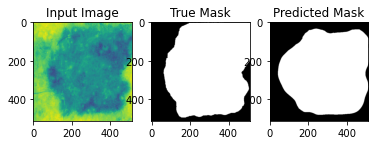

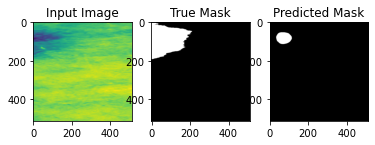

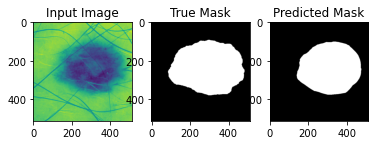

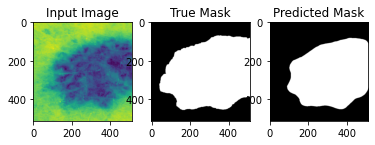

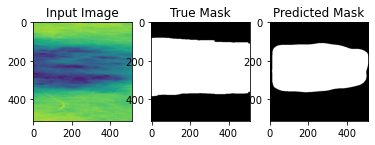

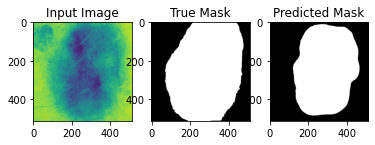

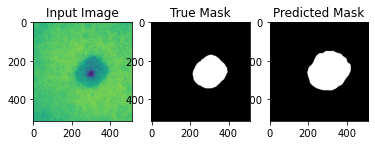

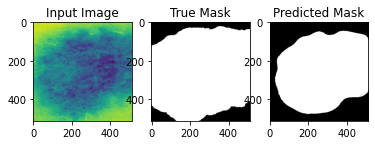

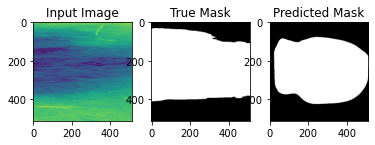

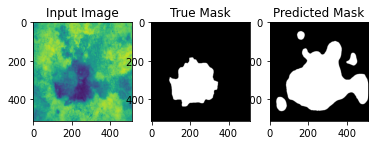

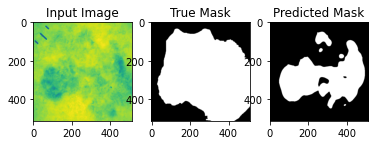

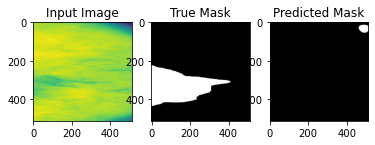

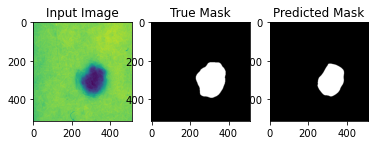

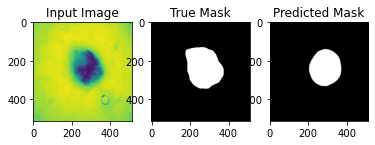

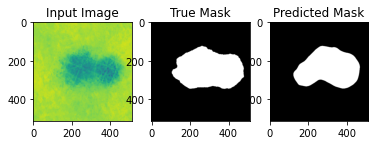

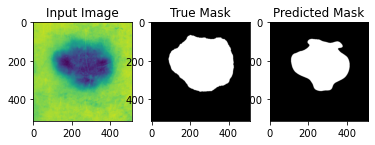

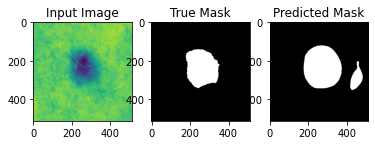

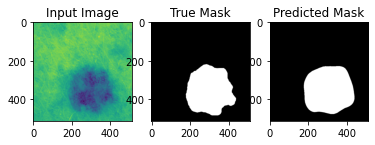

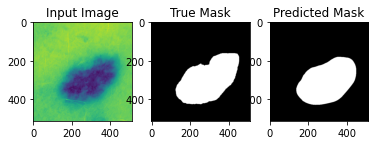

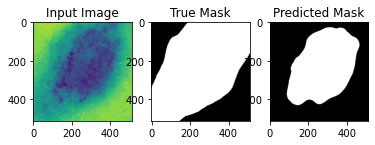

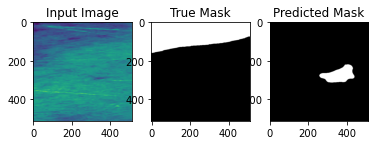

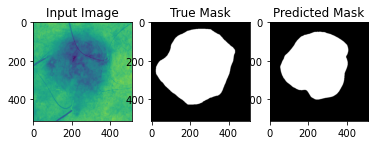

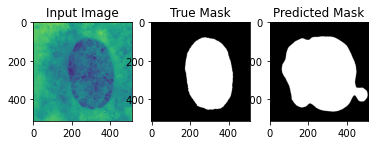

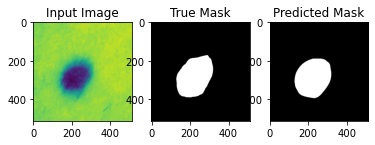

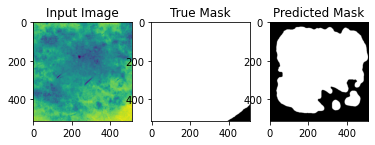

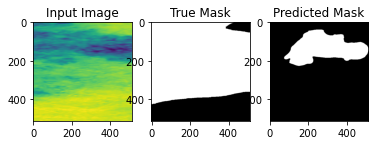

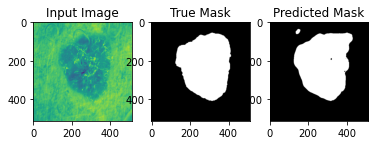

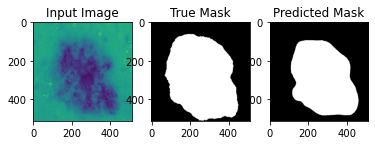

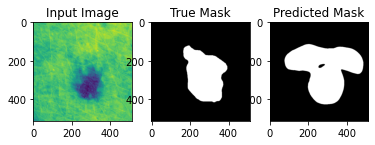

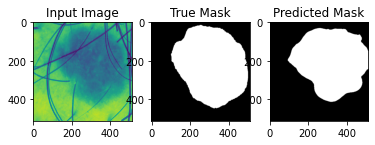

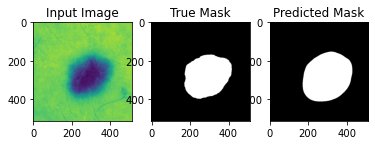

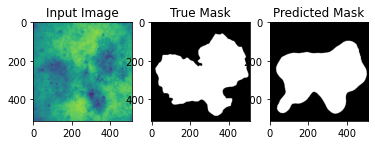

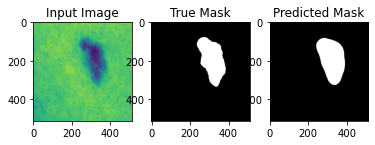

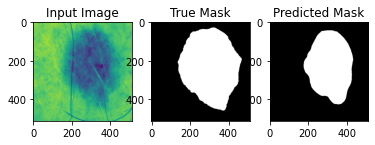

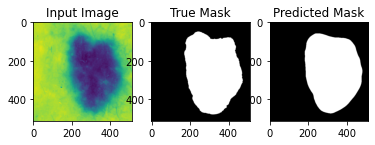

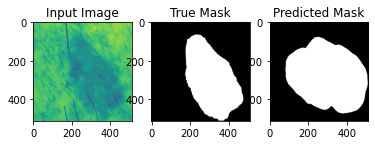

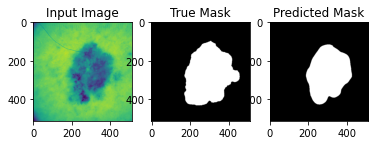

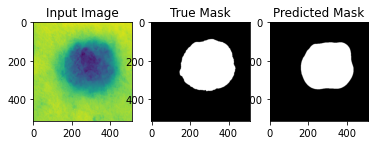

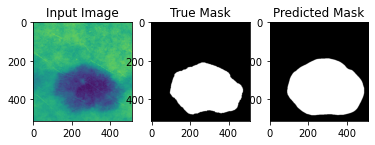

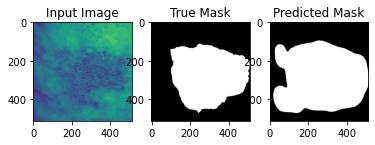

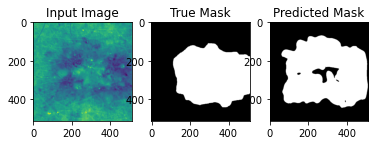

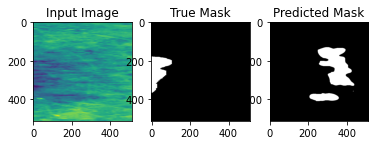

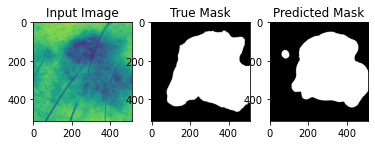

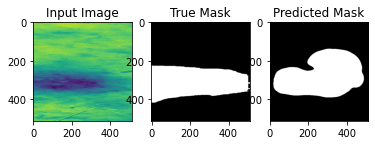

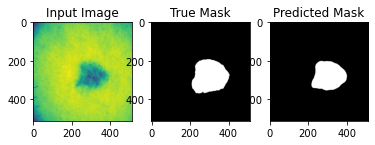

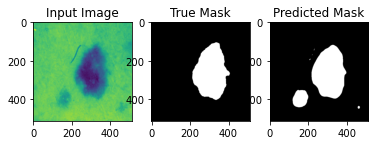

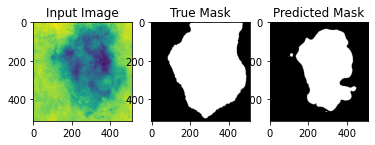

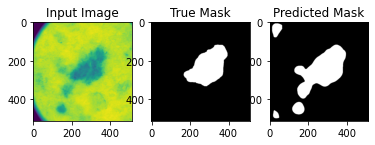

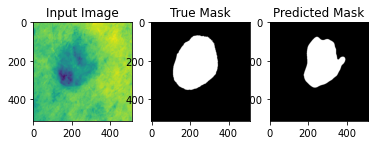

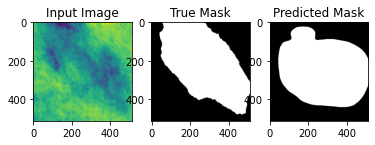

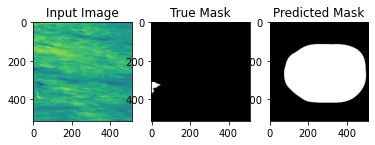

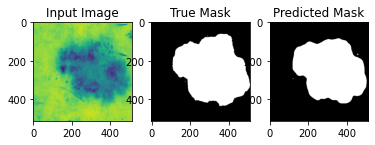

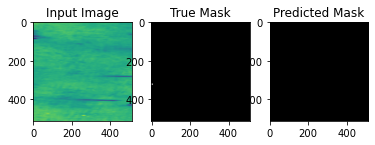

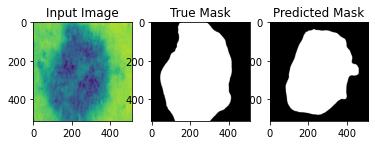

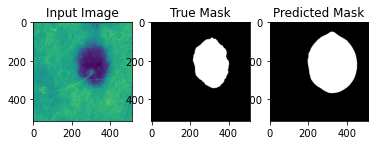

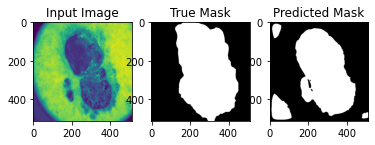

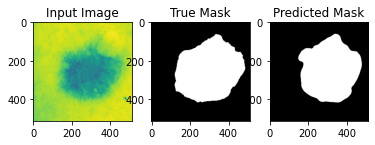

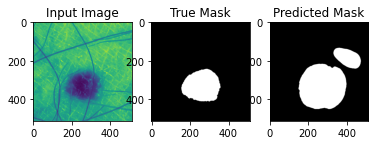

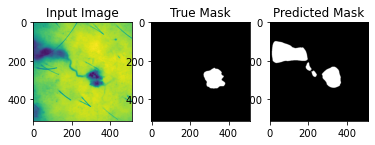

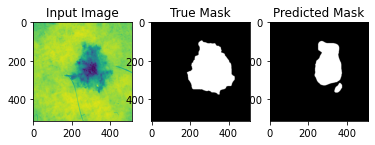

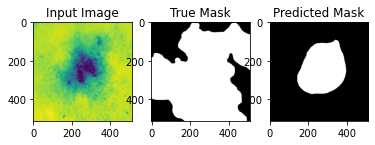

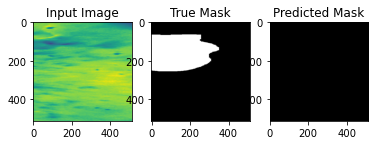

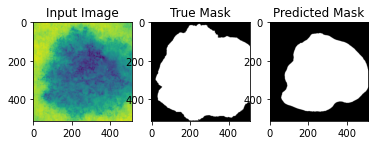

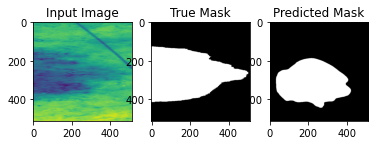

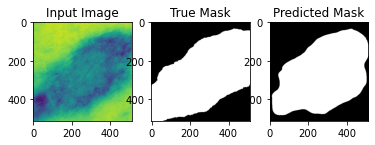

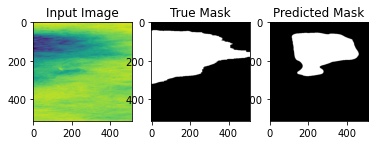

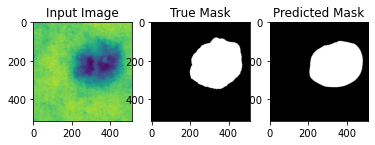

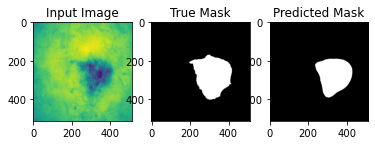

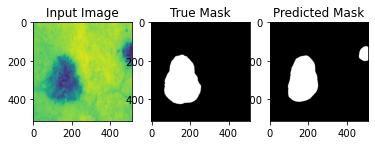

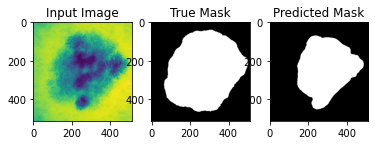

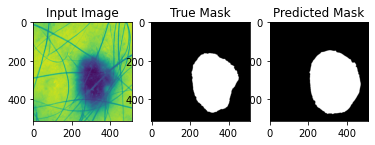

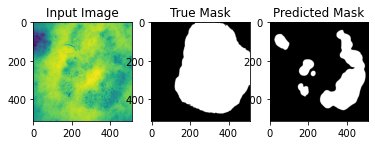

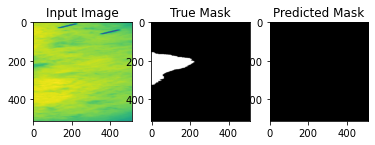

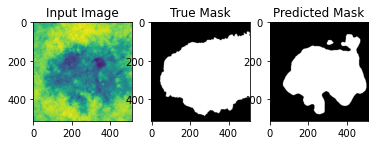

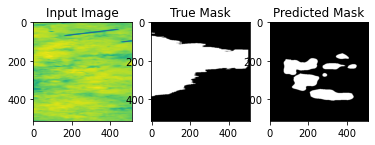

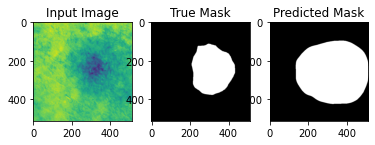

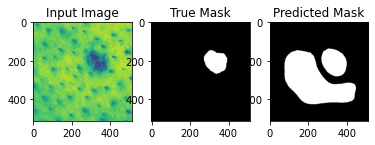

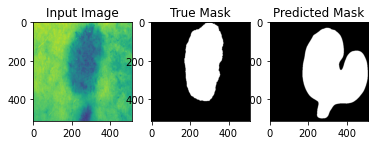

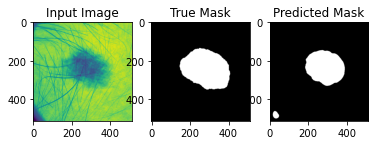

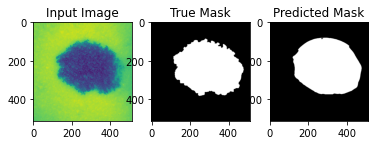

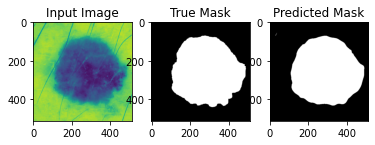

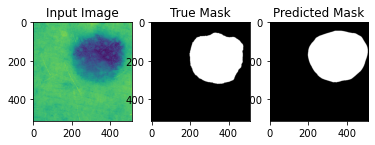

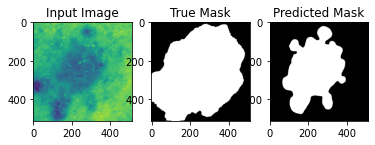

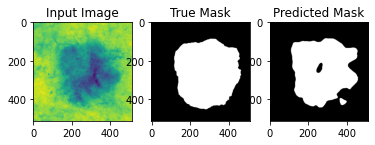

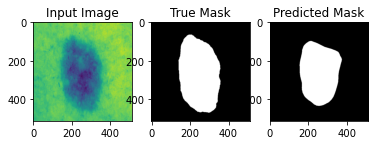

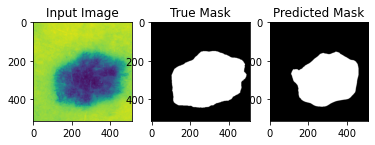

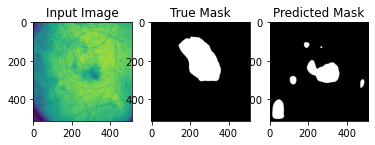

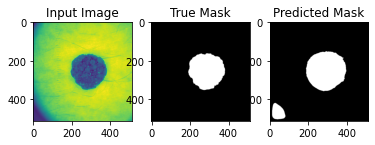

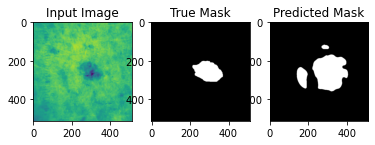

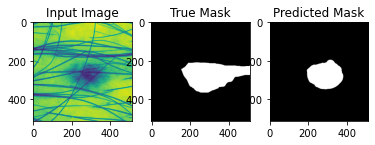

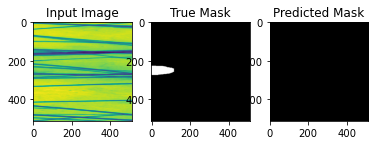

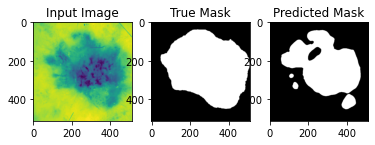

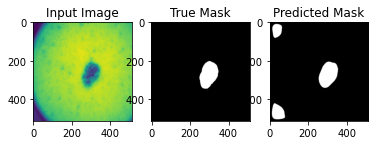

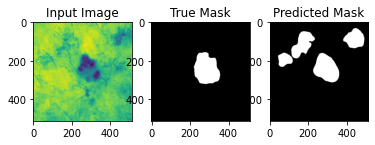

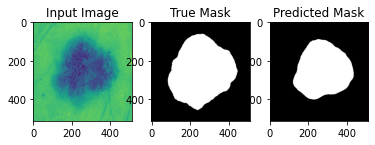

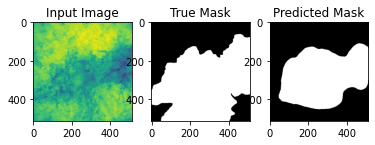

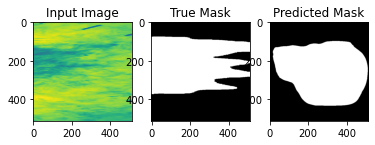

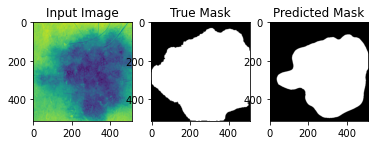

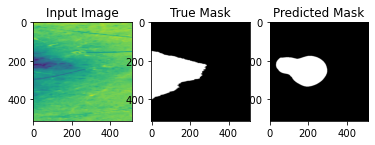

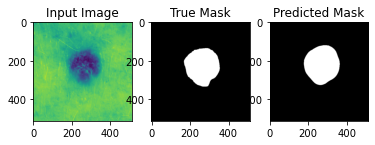

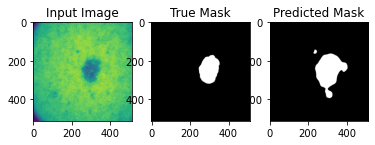

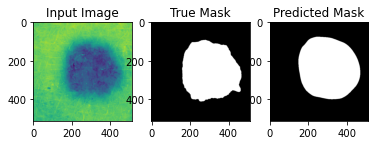

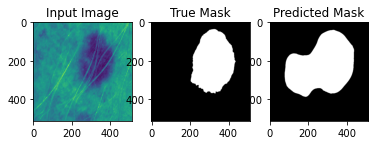

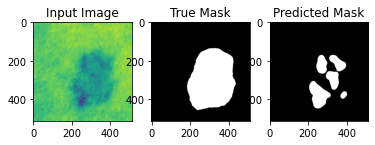

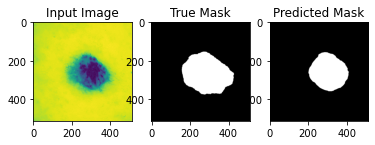

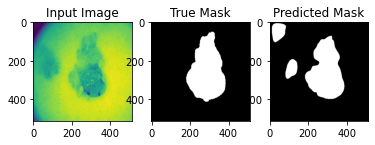

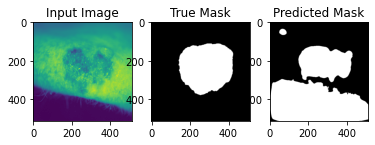

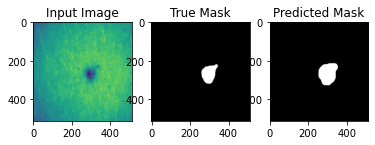

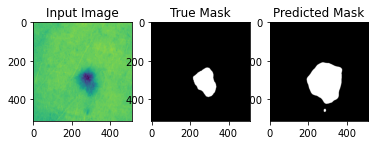

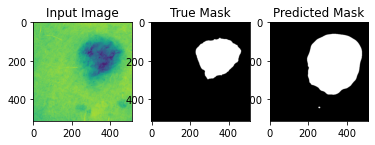

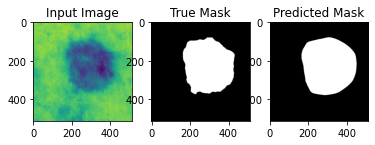

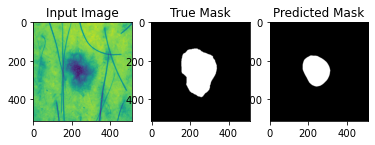

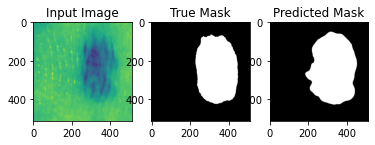

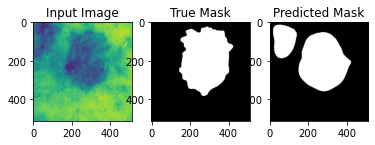

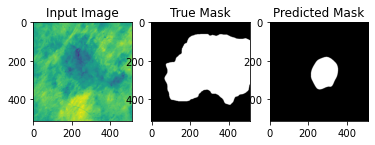

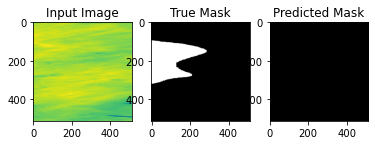

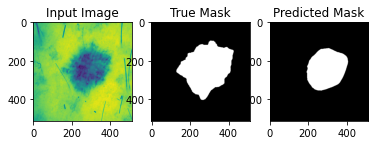

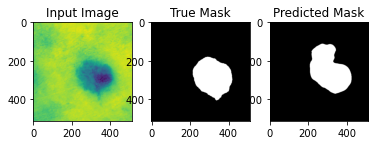

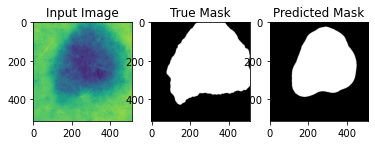

In [17]:
visualize_predictions(C, images[1000:1500], masks[1000:1500], num_samples=200)